In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import requests

In [3]:
initial_df = pd.read_csv('../Data/books.csv')

In [3]:
list(initial_df.columns)

['bookID',
 'title',
 'authors',
 'average_rating',
 'isbn',
 'isbn13',
 'language_code',
 '  num_pages',
 'ratings_count',
 'text_reviews_count',
 'publication_date',
 'publisher',
 'Unnamed: 12']

In [4]:
def clean_column_names(dataframe: pd.DataFrame):
    """
    Remove spaces from column names in a pandas DataFrame.

    Args:
    dataframe (pd.DataFrame): The DataFrame whose column names are to be cleaned.

    Returns:
    pd.DataFrame: DataFrame with cleaned column names.
    """
    dataframe.columns = [col.replace(' ', '').strip() for col in dataframe.columns]
    return dataframe

Needed to neaten up the columns a little bit.

In [20]:
initial_df = clean_column_names(initial_df)

In [6]:
initial_df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed:12
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78044E+12,eng,870,2153167,29221,09/01/2004,Scholastic Inc.,NaN
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11/01/2003,Scholastic,NaN
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,05/01/2004,Scholastic Inc.,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic,NaN


In [19]:
initial_df.replace(to_replace='J.K. Rowling-Mary GrandPré', value = 'J.K. Rowling', inplace=True)

There may be more of these, however I did not have time to search for more.

In [8]:
initial_df.dtypes

bookID                 int64
title                 object
authors               object
average_rating        object
isbn                  object
isbn13                object
language_code         object
num_pages             object
ratings_count          int64
text_reviews_count     int64
publication_date      object
publisher             object
Unnamed:12            object
dtype: object

In [21]:
initial_df['num_pages'] = pd.to_numeric(initial_df['num_pages'], errors='coerce')
initial_df['average_rating'] = pd.to_numeric(initial_df['average_rating'], errors='coerce')
initial_df = initial_df.dropna(subset=['num_pages', 'average_rating'])

In [10]:
initial_df.describe(include='all')

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed:12
count,11123.000000,11123,11123,11123.000000,11123,11123,11123,11123.000000,1.112300e+04,11123.000000,11123,11123,0
unique,NaN,10348,6639,NaN,11123,239,27,NaN,NaN,NaN,3679,2290,0
top,NaN,The Iliad,Stephen King,NaN,439785960,9.78014E+12,eng,NaN,NaN,NaN,10/01/2005,Vintage,NaN
freq,NaN,9,40,NaN,1,662,8908,NaN,NaN,NaN,56,318,NaN
mean,21310.856963,NaN,NaN,3.934075,NaN,NaN,NaN,336.405556,1.794285e+04,542.048099,NaN,NaN,NaN
std,13094.727252,NaN,NaN,0.350485,NaN,NaN,NaN,241.152626,1.124992e+05,2576.619589,NaN,NaN,NaN
min,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000,NaN,NaN,NaN
25%,10277.500000,NaN,NaN,3.770000,NaN,NaN,NaN,192.000000,1.040000e+02,9.000000,NaN,NaN,NaN
50%,20287.000000,NaN,NaN,3.960000,NaN,NaN,NaN,299.000000,7.450000e+02,47.000000,NaN,NaN,NaN
75%,32104.500000,NaN,NaN,4.140000,NaN,NaN,NaN,416.000000,5.000500e+03,238.000000,NaN,NaN,NaN


In [11]:
missing_values = initial_df.isnull().sum()
print(missing_values[missing_values > 0])

Unnamed:12    11123
dtype: int64


Nice clean data, a rare treat.

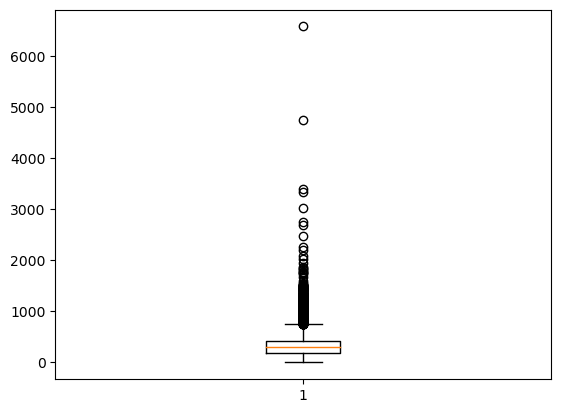

In [12]:
plt.boxplot(initial_df['num_pages'])
plt.show()

Text(0, 0.5, 'Count of Values')

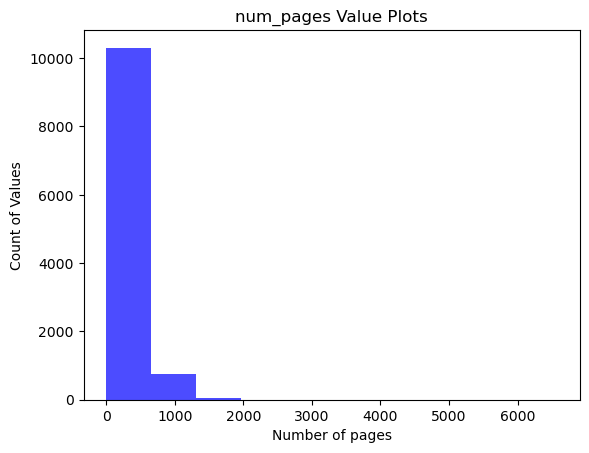

In [13]:
plt.hist(initial_df['num_pages'], color='blue', alpha=0.7)
plt.title('num_pages Value Plots')
plt.xlabel('Number of pages')
plt.ylabel('Count of Values')

Most books look relatively short, annoyingly we do not have the contents of each book. With that we could potentially build a more NLP focused model but sadly as I will show later the APIs did not work.

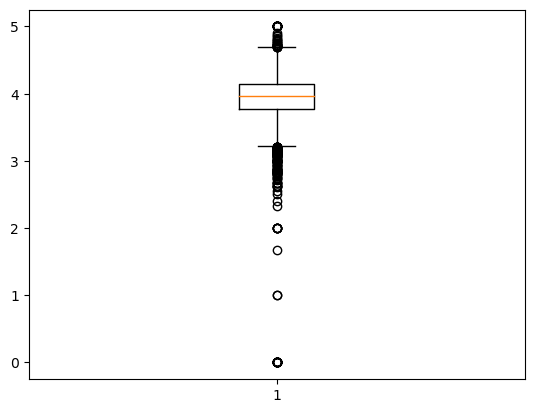

In [14]:
plt.boxplot(initial_df['average_rating'])
plt.show()

Text(0, 0.5, 'Count of Values')

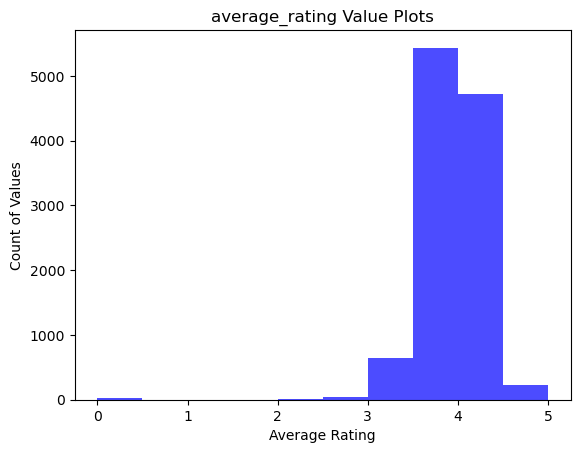

In [15]:
plt.hist(initial_df['average_rating'], color='blue', alpha=0.7)
plt.title('average_rating Value Plots')
plt.xlabel('Average Rating')
plt.ylabel('Count of Values')

In [16]:
top_20_books =  initial_df['title'].value_counts()[:20].iloc[::-1]
top_20_books

Frankenstein                  5
The Great Gatsby              6
The Scarlet Letter            6
The Secret Garden             6
Collected Stories             6
Romeo and Juliet              6
Jane Eyre                     6
Treasure Island               6
Robinson Crusoe               6
Sense and Sensibility         6
Macbeth                       6
The Histories                 6
A Midsummer Night's Dream     7
The Picture of Dorian Gray    7
Gulliver's Travels            8
'Salem's Lot                  8
Anna Karenina                 8
The Odyssey                   8
The Brothers Karamazov        9
The Iliad                     9
Name: title, dtype: int64

Text(0, 0.5, 'Title')

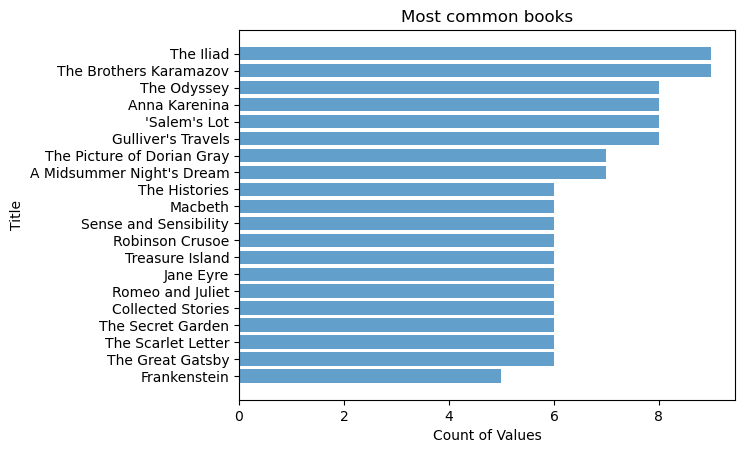

In [17]:
plt.barh(top_20_books.index, top_20_books, alpha=0.7)
plt.title('Most common books')
plt.xlabel('Count of Values')
plt.ylabel('Title')

In [18]:
top_20_authors =  initial_df['authors'].value_counts()[:20].iloc[::-1]
top_20_authors

Dean Koontz                    20
Gabriel García Márquez         20
Dan Simmons                    21
Alan Dean Foster               21
Janet Evanovich                21
Bill Bryson                    21
Gordon Korman                  22
Margaret Weis/Tracy Hickman    23
Laurell K. Hamilton            23
James Patterson                23
Terry Pratchett                23
Dick Francis                   28
Mercedes Lackey                29
Sandra Brown                   29
Piers Anthony                  30
Agatha Christie                33
Orson Scott Card               35
Rumiko Takahashi               39
P.G. Wodehouse                 40
Stephen King                   40
Name: authors, dtype: int64

Text(0, 0.5, 'Title')

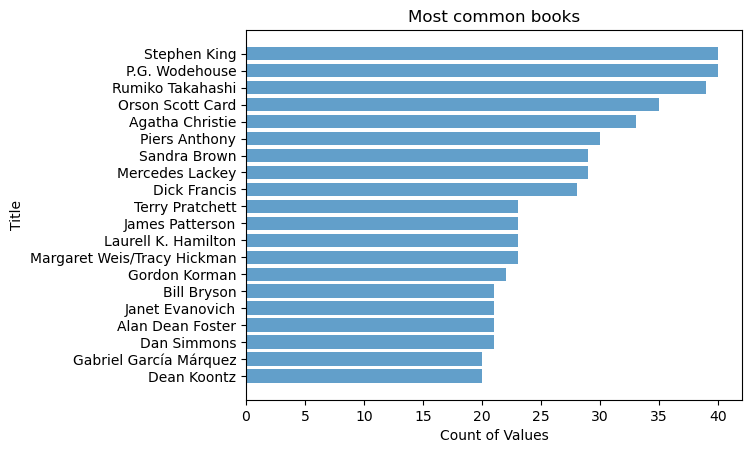

In [19]:
plt.barh(top_20_authors.index, top_20_authors, alpha=0.7)
plt.title('Most common books')
plt.xlabel('Count of Values')
plt.ylabel('Title')

In [20]:
common_langs = initial_df['language_code'].value_counts().iloc[::-1]
common_langs

ale         1
gla         1
tur         1
nor         1
ara         1
wel         1
glg         1
msa         1
nl          1
srp         1
rus         2
swe         2
lat         3
enm         3
ita         5
en-CA       7
por        10
grc        11
zho        14
mul        19
jpn        46
ger        99
fre       144
en-GB     214
spa       218
en-US    1408
eng      8908
Name: language_code, dtype: int64

Text(0, 0.5, 'Language')

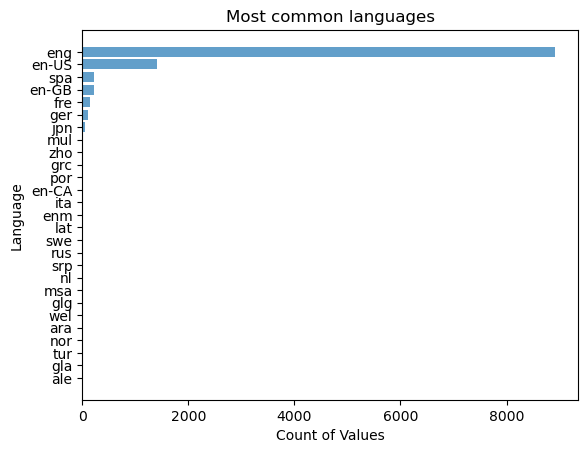

In [21]:
plt.barh(common_langs.index, common_langs, alpha=0.7)
plt.title('Most common languages')
plt.xlabel('Count of Values')
plt.ylabel('Language')

In [22]:
sorted_rating_df = initial_df.groupby('title').sum().sort_values(by='ratings_count', ascending=False)
sorted_rating_df.head()

,bookID,average_rating,num_pages,ratings_count,text_reviews_count
title,,,,,
Twilight (Twilight #1),41865,3.59,501.0,4597666,94265
The Hobbit or There and Back Again,5907,4.27,366.0,2530894,32871
The Catcher in the Rye,5107,3.80,277.0,2457092,43499
Angels & Demons (Robert Langdon #1),31374,11.67,1836.0,2425666,22076
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),4261,9.12,915.0,2342726,36465


In [23]:
most_rated = sorted_rating_df['ratings_count'].head(30)

Text(0, 0.5, 'Title')

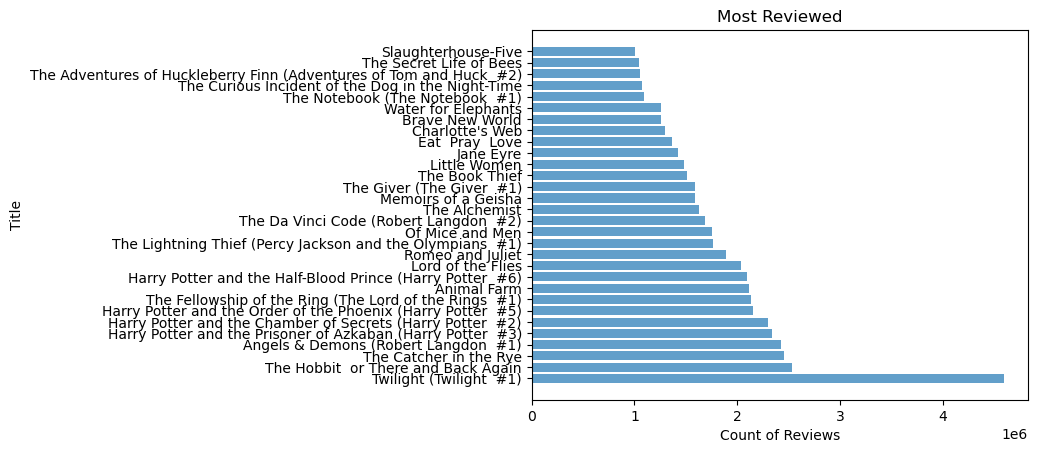

In [24]:
plt.barh(most_rated.index, most_rated, alpha=0.7)
plt.title('Most Reviewed')
plt.xlabel('Count of Reviews')
plt.ylabel('Title')

Some very high review counts, I may build a second model that filters for books with more than 20 reviews, this would make the rating more robust.

In [25]:
initial_df['publication_date'] = pd.to_datetime(initial_df['publication_date'], format='%m/%d/%Y', errors='coerce')
initial_df['publication_date']

0       2006-09-16
1       2004-09-01
2       2003-11-01
3       2004-05-01
4       2004-09-13
           ...    
11122   2004-12-21
11123   1988-12-01
11124   1993-08-01
11125   2007-02-27
11126   2006-05-28
Name: publication_date, Length: 11123, dtype: datetime64[ns]

In [26]:
initial_df = initial_df.dropna(subset=['publication_date'])

In [27]:
initial_df['year'] = initial_df['publication_date'].dt.year
time_df = initial_df.groupby('year').mean()
sample_counts = initial_df.groupby('year').size()

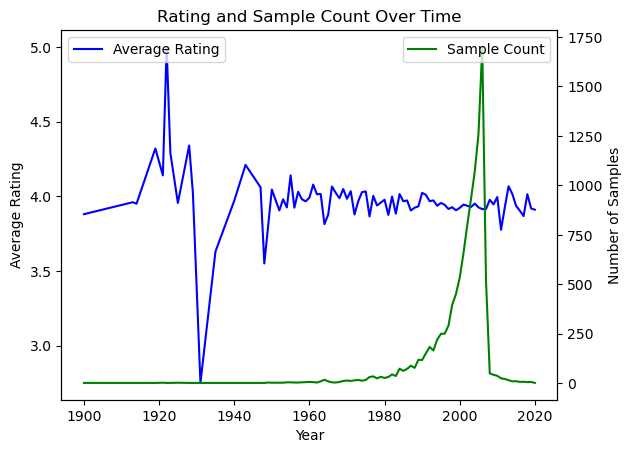

In [28]:

plt.plot(time_df['average_rating'], color='blue', label='Average Rating')
plt.title('Rating and Sample Count Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(loc='upper left')
ax2 = plt.twinx()
ax2.plot(sample_counts, color='green', label='Sample Count')
ax2.set_ylabel('Number of Samples')

ax2.legend(loc='upper right')
plt.show()

Lots of data between 1990-2010, interesting to see how the average rating fluctuates.

In [29]:
top_5_authors =  initial_df['authors'].value_counts()[:5]
top_5_authors

P.G. Wodehouse      40
Stephen King        40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Name: authors, dtype: int64

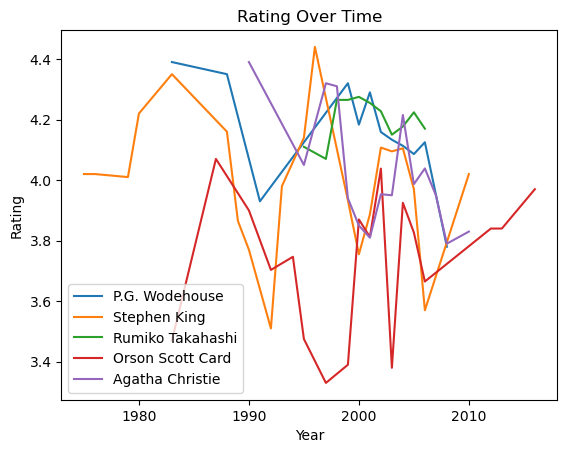

In [30]:
for author in top_5_authors.index:
    sub_df = initial_df[initial_df['authors']== author]
    sub_time_df = sub_df.groupby('year').mean()
    plt.plot(sub_time_df['average_rating'], label = author)
plt.title('Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.legend()
plt.show()

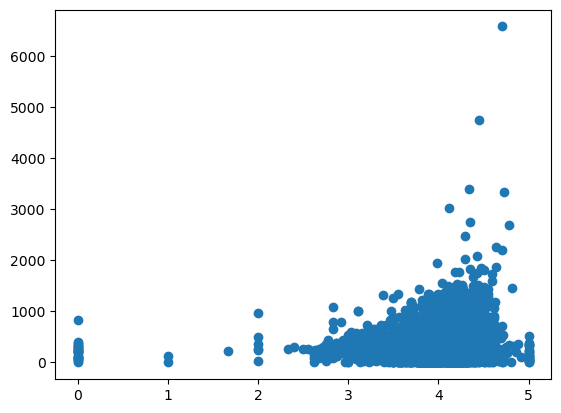

In [31]:
plt.scatter(initial_df['average_rating'], initial_df['num_pages'])

In [32]:
def plot_feature_combinations(df):
    """
    Plots scatter plots for all combinations of integer, float, and datetime columns.

    Args:
    df (pd.DataFrame): The DataFrame containing the features to plot.

    Description:
    This function identifies all integer, float, and datetime columns in the DataFrame
    and plots scatter plots for each pair of features. The plots are arranged in a grid layout.
    """
    numeric_cols = df.select_dtypes(include=[int, float])
    datetime_cols = df.select_dtypes(include=['datetime'])

    cols = pd.concat([numeric_cols, datetime_cols], axis=1)

    n = len(cols.columns)

    fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(15, 15))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i in range(n):
        for j in range(n):
            ax = axes[i, j]
            if i != j:
                ax.scatter(cols.iloc[:, j], cols.iloc[:, i], alpha=0.5)
            else:
                ax.hist(cols.iloc[:, i], bins=15, alpha=0.7)
            if i == n - 1:
                ax.set_xlabel(cols.columns[j])
            if j == 0:
                ax.set_ylabel(cols.columns[i])
            if np.issubdtype(cols.iloc[:, j].dtype, np.datetime64):
                ax.xaxis.set_major_locator(mdates.YearLocator())
                ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.show()

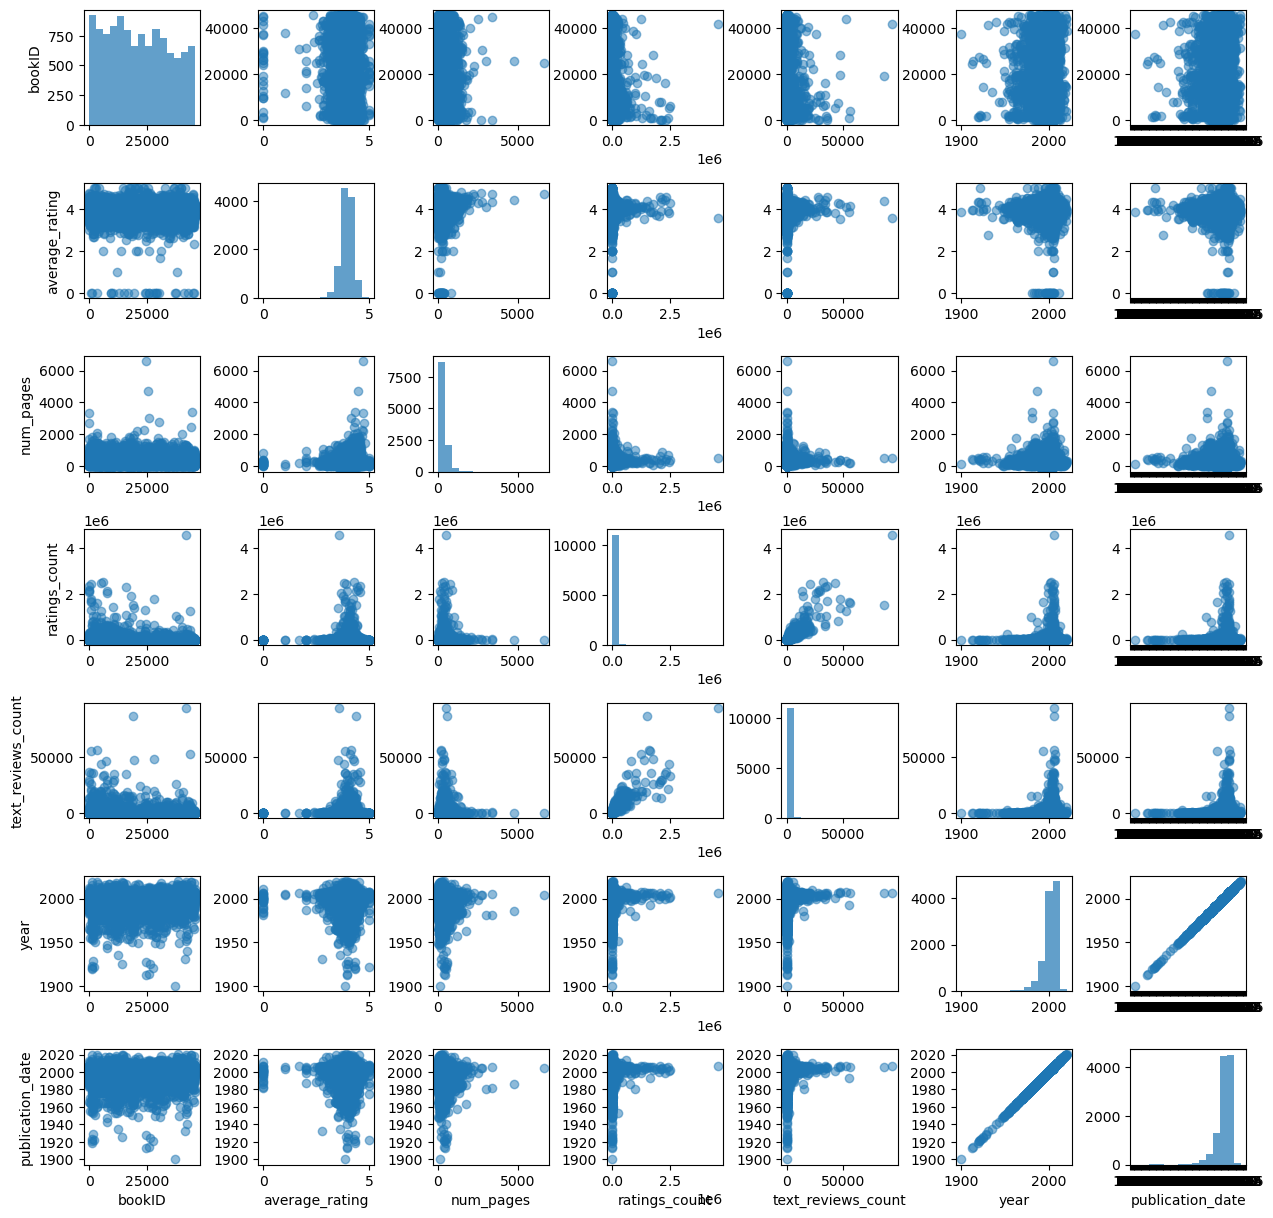

In [33]:
plot_feature_combinations(initial_df)

In [34]:
def seaborn_scatter_matrix(df, plot_size, text_size):
    """
    Plots a scatter matrix for numerical columns in a DataFrame using Seaborn.

    Args:
    df (pd.DataFrame): The DataFrame to plot.
    plot_size (float): The size of the plot.
    text_size (int): The font size for annotations.

    Description:
    This function selects only numerical columns from the given DataFrame, removes columns
    with all null values, and keeps only those with more than one unique value. It then
    plots a scatter matrix using Seaborn's pairplot function, with kernel density estimations
    on the diagonal.
    """
    df_numeric = df.select_dtypes(include=[np.number])
    df_numeric = df_numeric.dropna(axis=1, how='all')
    df_filtered = df_numeric.loc[:, df_numeric.nunique() > 1]
    columns = df_filtered.columns[:min(len(df_filtered.columns), 10)]
    sns.set(style="whitegrid")
    g = sns.pairplot(df_filtered[columns], diag_kind='kde', plot_kws={'alpha':0.75})

    g.fig.set_size_inches(plot_size, plot_size)

    plt.rcParams.update({'font.size': text_size})

    plt.show()


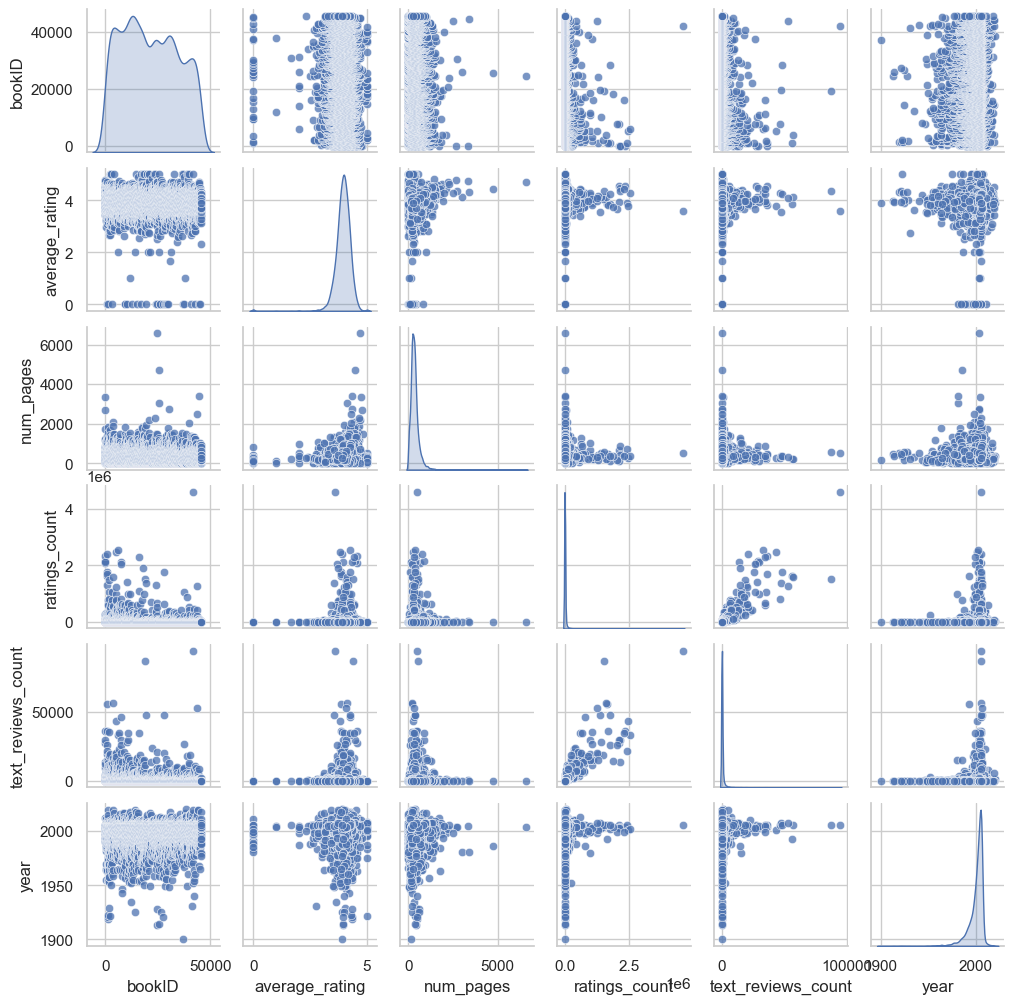

In [35]:
seaborn_scatter_matrix(initial_df, 10, 10)

These would be some of the numerical features passed to a model so it is interesting to see if any visula correlations exist, I could also add a correlation matrix.

In [1]:
def get_book_summary(isbn):
    """
    Fetches book information including summary using the Google Books API.

    Args:
    isbn (str): The ISBN of the book.

    Returns:
    str: A summary or description of the book, if available.
    """
    isbn = format(float(isbn), '.0f') 
    url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        items = data.get("items", [])
        if items:
            print(items)
            volume_info = items[0].get("volumeInfo", {})
            return volume_info.get("description", "No description available.")
    return "Nan"

I spent far too long arguing with this, mainly for the data in v2 as I wanted to use the summary to create a more robust TF-IDF model to find similar books based on these. Unfortunately the api would have taken too long to get all the data (around 2 days) due to me being throttled. I thought I would leave the function here incase you fancy using it or getting it to work. As a result of me not getting the summary data I did not try the TF-IDF but it is something I would like to try in future. With the given fields I had for my two datasets though it did not seem appropriate to use.

In [67]:
isbn = initial_df['isbn13'].iloc[0]  
print(get_book_summary(isbn))

[{'kind': 'books#volume', 'id': 'TKEfAAAACAAJ', 'etag': 'oTUX0h/qTOc', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/TKEfAAAACAAJ', 'volumeInfo': {'title': 'Monologues on Black Life', 'authors': ['Ruth Symes', 'John Stringer', 'M. Askew', 'Sheila Ebbutt'], 'publisher': 'Greenwood International', 'publishedDate': '2006-09-01', 'description': 'A lively and full-colour textbook beautifually illustrates the practical aspects of cookery, whilst providing candidates with all the underpinning theory they need for Level 2.', 'industryIdentifiers': [{'type': 'ISBN_10', 'identifier': '0440000009'}, {'type': 'ISBN_13', 'identifier': '9780440000006'}], 'readingModes': {'text': False, 'image': False}, 'printType': 'BOOK', 'maturityRating': 'NOT_MATURE', 'allowAnonLogging': False, 'contentVersion': 'preview-1.0.0', 'language': 'en', 'previewLink': 'http://books.google.co.uk/books?id=TKEfAAAACAAJ&dq=isbn:9780440000000&hl=&cd=1&source=gbs_api', 'infoLink': 'http://books.google.co.uk/books?i

Below are some simple ideas for recomendations, these could sit on a web page and allow users to simply browse through the books. In this case I will simply filter these and look at books that way. These are basically just charts for the books list based on the rating and a set field.

In [7]:
def filter_and_sort_books(books_df: pd.DataFrame, min_reviews: int = 50, publication: str = None, author: str = None) -> pd.DataFrame:
    """
    Filters and sorts books based on rating, number of reviews, publication and author.
    
    Arguments:
    books_df (pd.DataFrame): DataFrame containing book information with columns for rating,
                             number of reviews, publication, and author.
    min_reviews (int): Minimum number of reviews for a book to be considered (default 50).
    publication (str, optional): Filter books by this publication. Defaults to None.
    author (str, optional): Filter books by this author. Defaults to None.

    Returns:
    pd.DataFrame: DataFrame containing the top 10 books based on the specified criteria.
                   Returns an empty DataFrame if the publication or author does not exist in the dataset.
    """
    filtered_df = books_df[books_df['ratings_count'] >= min_reviews]

    if publication and publication not in books_df['publisher'].unique():
        print(f"Publication '{publication}' not found in the dataset.")
        return pd.DataFrame()
    
    if author and author not in books_df['authors'].unique():
        print(f"Author '{author}' not found in the dataset.")
        return pd.DataFrame()

    if publication:
        filtered_df = filtered_df[filtered_df['publisher'] == publication]
    if author:
        filtered_df = filtered_df[filtered_df['authors'] == author]

    sorted_df = filtered_df.sort_values(by=['average_rating', 'ratings_count'], ascending=[False, False])

    return sorted_df.head(10)

In [22]:
filter_and_sort_books(initial_df)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed:12
6590,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,740748475,9.78074E+12,eng,1456.0,32213,930,09/06/2005,Andrews McMeel Publishing,NaN
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.78044E+12,eng,2690.0,41428,164,9/13/2004,Scholastic,NaN
6592,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,836221362,9.78084E+12,eng,176.0,23875,303,09/01/1996,Andrews McMeel Publishing,NaN
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,439827604,9.78044E+12,eng,3342.0,28242,808,09/12/2005,Scholastic,NaN
1848,6550,Early Color,Saul Leiter/Martin Harrison,4.73,3865211399,9.78387E+12,eng,156.0,144,8,1/15/2006,Steidl,NaN
6593,24816,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,Bill Watterson,4.72,836217691,9.78084E+12,eng,176.0,15365,290,09/06/1994,Andrews McMeel Publishing,NaN
8933,34545,Elliott Erwitt: Snaps,Murray Sayle/Charles Flowers/Elliott Erwitt,4.72,071484330X,9.78071E+12,en-GB,544.0,102,6,06/01/2003,Phaidon Press,NaN
6596,24820,Calvin and Hobbes: Sunday Pages 1985-1995: An ...,Bill Watterson,4.71,740721356,9.78074E+12,eng,96.0,3613,85,9/17/2001,Andrews McMeel Publishing,NaN
5616,20749,Study Bible: NIV,Anonymous,4.70,310929555,9.78031E+12,eng,2198.0,4166,186,10/01/2002,Zondervan Publishing House,NaN
6500,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,039306011X,9.78039E+12,eng,6576.0,1338,81,10/17/2004,W. W. Norton Company,NaN


In [15]:
def books_by_same_author(books_df: pd.DataFrame, book_name: str) -> pd.DataFrame:
    """
    Returns books from the same author for a given book name.

    Arguments:
    books_df (pd.DataFrame): DataFrame containing book information.
    book_name (str): The name of the book.

    Returns:
    pd.DataFrame: DataFrame containing books from the same author.
                   Returns an empty DataFrame if the book is not found.
    """
    if book_name not in books_df['title'].values:
        print("Please check spelling as book not found.")
        return pd.DataFrame()

    author = books_df.loc[books_df['title'] == book_name, 'authors'].values[0]
    return books_df[books_df['authors'] == author]

def books_by_same_publisher(books_df: pd.DataFrame, book_name: str) -> pd.DataFrame:
    """
    Returns books from the same publisher for a given book name.

    Arguments:
    books_df (pd.DataFrame): DataFrame containing book information.
    book_name (str): The name of the book.

    Returns:
    pd.DataFrame: DataFrame containing books from the same publisher.
                   Returns an empty DataFrame if the book is not found.
    """
    if book_name not in books_df['title'].values:
        print("Please check spelling as book not found.")
        return pd.DataFrame()

    publisher = books_df.loc[books_df['title'] == book_name, 'publisher'].values[0]
    return books_df[books_df['publisher'] == publisher]

In [24]:
books_by_same_author(initial_df,"The Complete Calvin and Hobbes")

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed:12
6590,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,740748475,9.78074E+12,eng,1456.0,32213,930,09/06/2005,Andrews McMeel Publishing,NaN
6591,24813,The Calvin and Hobbes Tenth Anniversary Book,Bill Watterson,4.63,836204387,9.78084E+12,eng,208.0,49122,368,09/05/1995,Andrews McMeel Publishing,NaN
6592,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,836221362,9.78084E+12,eng,176.0,23875,303,09/01/1996,Andrews McMeel Publishing,NaN
6593,24816,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,Bill Watterson,4.72,836217691,9.78084E+12,eng,176.0,15365,290,09/06/1994,Andrews McMeel Publishing,NaN
6594,24818,The Days Are Just Packed,Bill Watterson,4.69,836217357,9.78084E+12,eng,176.0,20308,244,09/01/1993,Andrews McMeel Publishing,NaN
6595,24819,The Calvin And Hobbes: Tenth Anniversary Book,Bill Watterson,4.63,751515574,9.78075E+12,eng,208.0,303,12,02/01/2008,Time Warner Books UK,NaN
6596,24820,Calvin and Hobbes: Sunday Pages 1985-1995: An ...,Bill Watterson,4.71,740721356,9.78074E+12,eng,96.0,3613,85,9/17/2001,Andrews McMeel Publishing,NaN


In [25]:
books_by_same_publisher(initial_df, 'The Complete Calvin and Hobbes')

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Unnamed:12
2188,7841,Another Day in Paradise: The Fourth Sherman's ...,Jim Toomey,4.35,740720120,9.78074E+12,eng,130.0,68,1,09/06/2001,Andrews McMeel Publishing,NaN
2189,7842,Another Day in Cubicle Paradise,Scott Adams,4.01,740721941,9.78074E+12,eng,128.0,416,11,03/01/2002,Andrews McMeel Publishing,NaN
2856,10594,Stephen King: America's Best-Loved Boogeyman,George Beahm,3.78,836254279,9.78084E+12,en-US,304.0,50,2,05/01/1998,Andrews McMeel Publishing,NaN
2861,10606,Stephen King from A to Z: An Encyclopedia of H...,George Beahm,3.83,836269144,9.78084E+12,eng,251.0,53,2,3/31/1999,Andrews McMeel Publishing,NaN
6252,23563,"Ebert's ""Bigger"" Little Movie Glossary",Roger Ebert/Ray Ebert,3.87,836282892,9.78084E+12,en-US,228.0,82,9,12/03/2005,Andrews McMeel Publishing,NaN
6253,23573,The Perfect London Walk,Roger Ebert/Daniel Curley/Jack Lane,4.26,836279298,9.78084E+12,eng,123.0,40,6,01/01/1986,Andrews McMeel Publishing,NaN
6590,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,740748475,9.78074E+12,eng,1456.0,32213,930,09/06/2005,Andrews McMeel Publishing,NaN
6591,24813,The Calvin and Hobbes Tenth Anniversary Book,Bill Watterson,4.63,836204387,9.78084E+12,eng,208.0,49122,368,09/05/1995,Andrews McMeel Publishing,NaN
6592,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,836221362,9.78084E+12,eng,176.0,23875,303,09/01/1996,Andrews McMeel Publishing,NaN
6593,24816,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,Bill Watterson,4.72,836217691,9.78084E+12,eng,176.0,15365,290,09/06/1994,Andrews McMeel Publishing,NaN


The above could easily be made into a UI but in the interest of time I have chosen to just demo these. 